<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#COMUNICACIÓN-DE-RESULTADOS" data-toc-modified-id="COMUNICACIÓN-DE-RESULTADOS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>COMUNICACIÓN DE RESULTADOS</a></span></li><li><span><a href="#6.2-CONTEXTO-DE-ANÁLISIS:" data-toc-modified-id="6.2-CONTEXTO-DE-ANÁLISIS:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>6.2 CONTEXTO DE ANÁLISIS:</a></span></li><li><span><a href="#6.3-OBJETIVOS:" data-toc-modified-id="6.3-OBJETIVOS:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>6.3 OBJETIVOS:</a></span></li><li><span><a href="#6.4-CONCLUSIONES-EJECUTIVAS:" data-toc-modified-id="6.4-CONCLUSIONES-EJECUTIVAS:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>6.4 CONCLUSIONES EJECUTIVAS:</a></span></li><li><span><a href="#6.5-DETALLE-DE-LOS-PRINCIPALES-RESULTADOS:" data-toc-modified-id="6.5-DETALLE-DE-LOS-PRINCIPALES-RESULTADOS:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>6.5 DETALLE DE LOS PRINCIPALES RESULTADOS:</a></span><ul class="toc-item"><li><span><a href="#6.5.1-Existen-10-barrios-con-alto-potencial-de-inversión" data-toc-modified-id="6.5.1-Existen-10-barrios-con-alto-potencial-de-inversión-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span><strong>6.5.1 Existen 10 barrios con alto potencial de inversión</strong></a></span></li><li><span><a href="#6.5.2-Buscar-inmuebles-de-una-habitación-que-permitan-3-huéspedes" data-toc-modified-id="6.5.2-Buscar-inmuebles-de-una-habitación-que-permitan-3-huéspedes-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span><strong>6.5.2 Buscar inmuebles de una habitación que permitan 3 huéspedes</strong></a></span></li><li><span><a href="#6.5.3-Buscar-inmuebles-que-estando-en-uno-de-los-barrios-identificados-no-estén-necesariamente-cerca-de-puntos-de-interés" data-toc-modified-id="6.5.3-Buscar-inmuebles-que-estando-en-uno-de-los-barrios-identificados-no-estén-necesariamente-cerca-de-puntos-de-interés-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span><strong>6.5.3 Buscar inmuebles que estando en uno de los barrios identificados no estén necesariamente cerca de puntos de interés</strong></a></span></li><li><span><a href="#6.5.4-Evaluar-el-desarrollo-de-un-nuevo-producto-basado-en-el-alquier-para-momentos-concretos-de-alto-interés-deportivo" data-toc-modified-id="6.5.4-Evaluar-el-desarrollo-de-un-nuevo-producto-basado-en-el-alquier-para-momentos-concretos-de-alto-interés-deportivo-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span><strong>6.5.4 Evaluar el desarrollo de un nuevo producto basado en el alquier para momentos concretos de alto interés deportivo</strong></a></span></li></ul></li></ul></div>

In [9]:
#SETUP

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

#Automcompletar rápido
%config IPCompleter.greedy=True

pd.options.display.max_columns = None

con = sa.create_engine('sqlite:///../Datos/airbnb.db')

df = pd.read_sql('df_preparado', con = con)

df.rename(columns = {'accommodates_dic':'accommodates_disc', 'beds_dic':'beds_disc'}, inplace= True)

#Minicubo:

metricas = ['precio_total','precio_compra']
dimensiones = ['bedrooms_disc','accommodates_disc','beds_disc','number_of_reviews_disc']

minicubo_precio = df[dimensiones + metricas]

minicubo_precio = minicubo_precio.melt(id_vars=['precio_total','precio_compra'])

minicubo_precio = minicubo_precio.groupby(['variable','value'])[['precio_total','precio_compra']].agg('median')

# COMUNICACIÓN DE RESULTADOS

# 6.2 CONTEXTO DE ANÁLISIS:

La empresa ha seleccionado la ciudad de Madrid como candidata para buscar inmuebles en los que invertir con el objetivo de obtener rentabilidad mediante alquiler turístico.

Para ello, antes de poner al equipo de valoraciones a buscar oportunidades, la dirección ha encargado al equipo de Data Science un análisis de Discovery que permita identificar estrategias o líneas de trabajo que ayuden a dirigir la actuación del equipo de valoraciones.

# 6.3 OBJETIVOS:

- Analizar las fuentes de datos públicas disponibles
- Para encontrar insights que ayuden a entender las características del mercado en esta ciudad
- Y guíen el trabajo de búsqueda del equipo de valoraciones
- Especialmente en cuanto a los principales ejes: precio del alquiler, niveles de ocupación y precio de compra

# 6.4 CONCLUSIONES EJECUTIVAS:

- Se han localizado 10 barrios en los que centrar la búsqueda
- Se recomienda buscar inmuebles con un habitación que permitan alojar 3 huéspedes
- Se recomienda buscar inmuebles que estando en uno de los barrios identificados no estén necesariamente cerca de puntos de interés
- Se recomienda evaluar el desarrollo de un nuevo producto basado en el alquier para momentos concretos de alto interés deportivo, especialmente en el barrio de San Blas

# 6.5 DETALLE DE LOS PRINCIPALES RESULTADOS:

## **6.5.1 Existen 10 barrios con alto potencial de inversión**

- Se han localizado 10 barrios que apriori pueden maximizar la relación coste-ingresos
- Además podemos segmentarlos por el tipo calidad del inmueble en el que nos interes invertir en 4 grandes grupos
- Estos son los 10 barrios donde comenzar a buscar oportunidades concretas:
    - Inversión baja: Simancas, Ambroz, Marroquina, San Juan Bautista
    - Inversión media: El Plantio, Valdemarín, Valdefuentes
    - Inversión media-alta: Jerónimos, Fuentela reina
    - Inversión alta: Recoletos

Exhibit 1.4.1

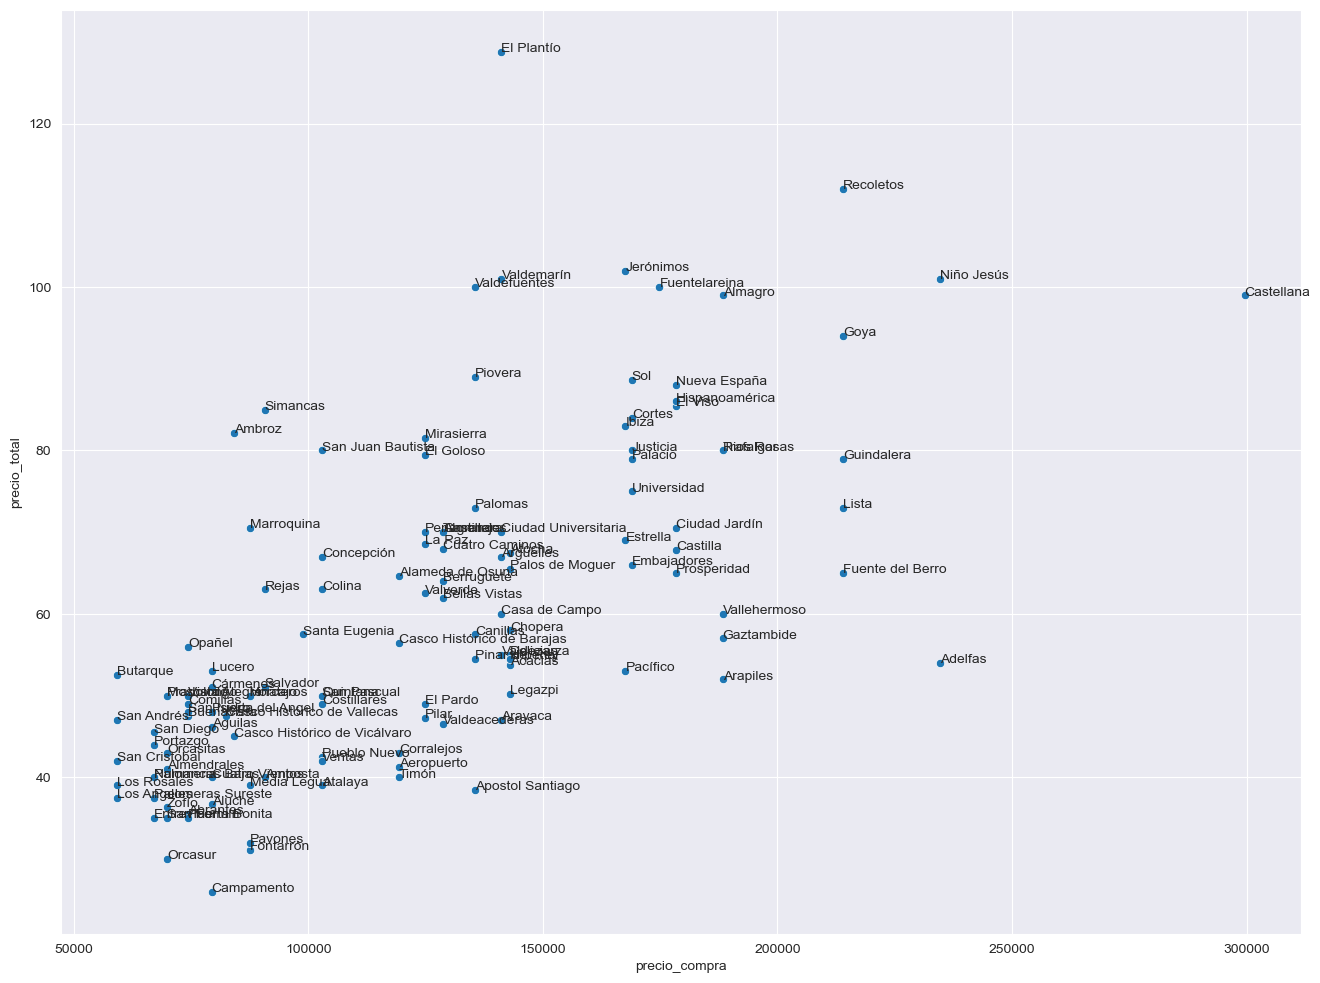

In [10]:
no_incluir = ['Rosas','Arcos','Canillejas','Hellín']

temp = df.groupby('neighbourhood')[['precio_total','precio_compra']].median()

temp = temp[~temp.index.isin(no_incluir)]

plt.figure(figsize = (16,12))
sns.set_style('darkgrid')
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra[cada], temp.precio_total[cada], temp.index[cada])

## **6.5.2 Buscar inmuebles de una habitación que permitan 3 huéspedes**

- El número de huéspedes que maximiza el precio de compra pagado es de 3

Exhibit 1.4.2

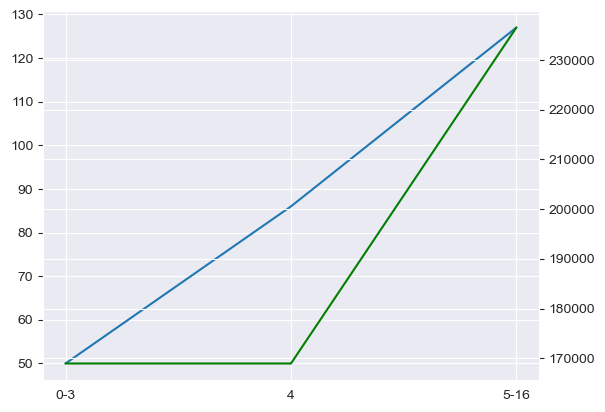

In [11]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['accommodates_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['accommodates_disc'].precio_compra,color = 'green');

## **6.5.3 Buscar inmuebles que estando en uno de los barrios identificados no estén necesariamente cerca de puntos de interés**

* Previsiblemente tendrán menor precio de compra
* Parece que la cercanía a puntos de interés no tiene un especial impacto sobre el precio del alquiler

Exhibit 1.4.3

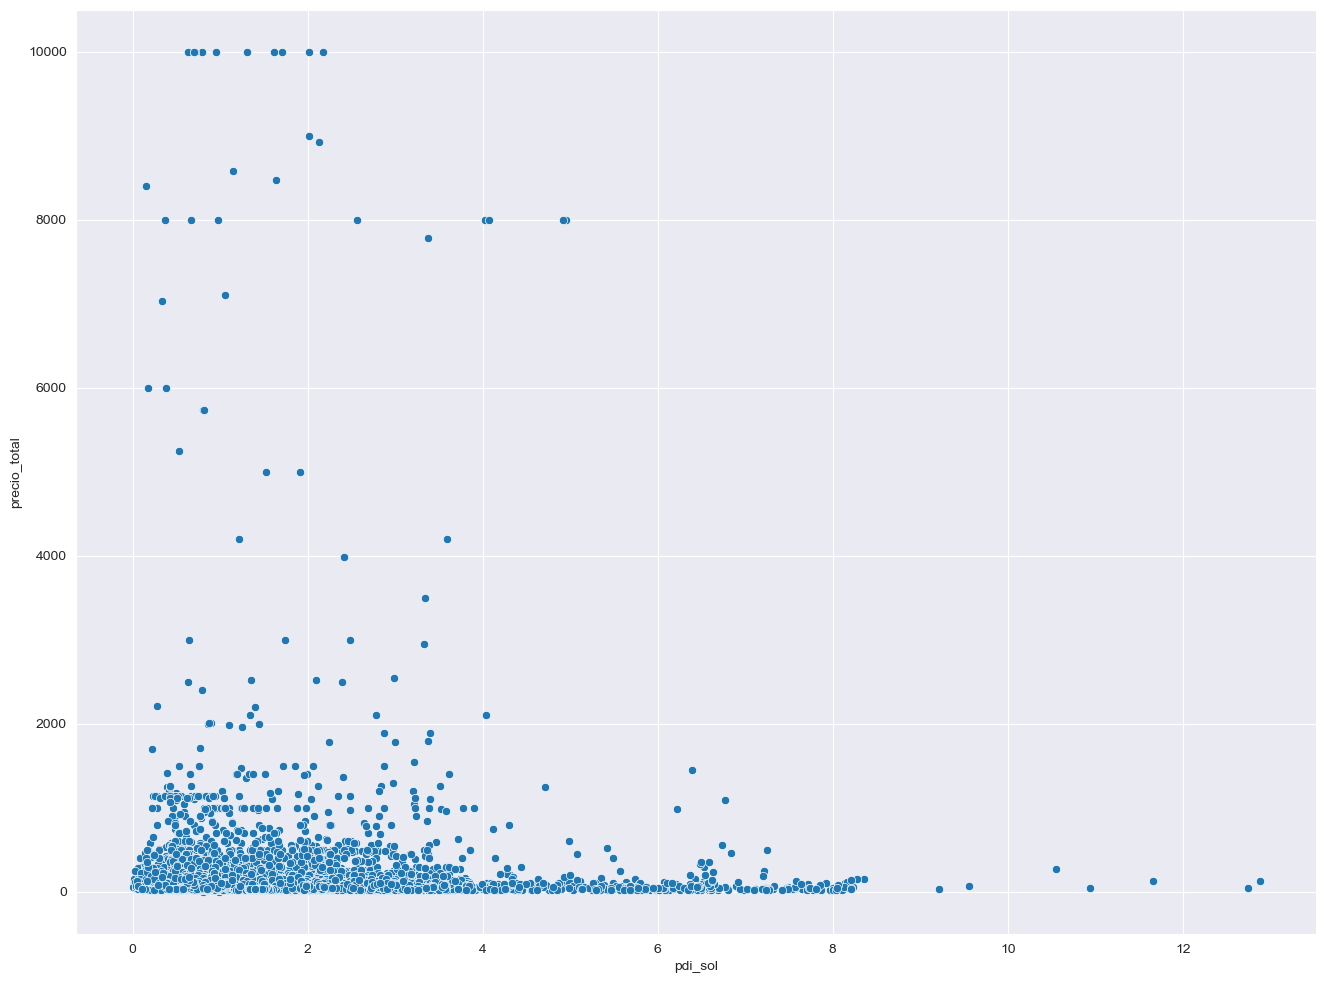

In [13]:
seleccion = df.groupby('distrito').pdi_sol.median().sort_values()[0:7].index.to_list()

plt.figure(figsize = (16,12))
sns.scatterplot(data = df.loc[df.distrito.isin(seleccion)], x = 'pdi_sol', y = 'precio_total');

## **6.5.4 Evaluar el desarrollo de un nuevo producto basado en el alquier para momentos concretos de alto interés deportivo**

- Buscar oportunidades en el barrio de San Blas
- Todavía existen muchos alquileres que no están explotando este potencial

Exhibit 1.4.4

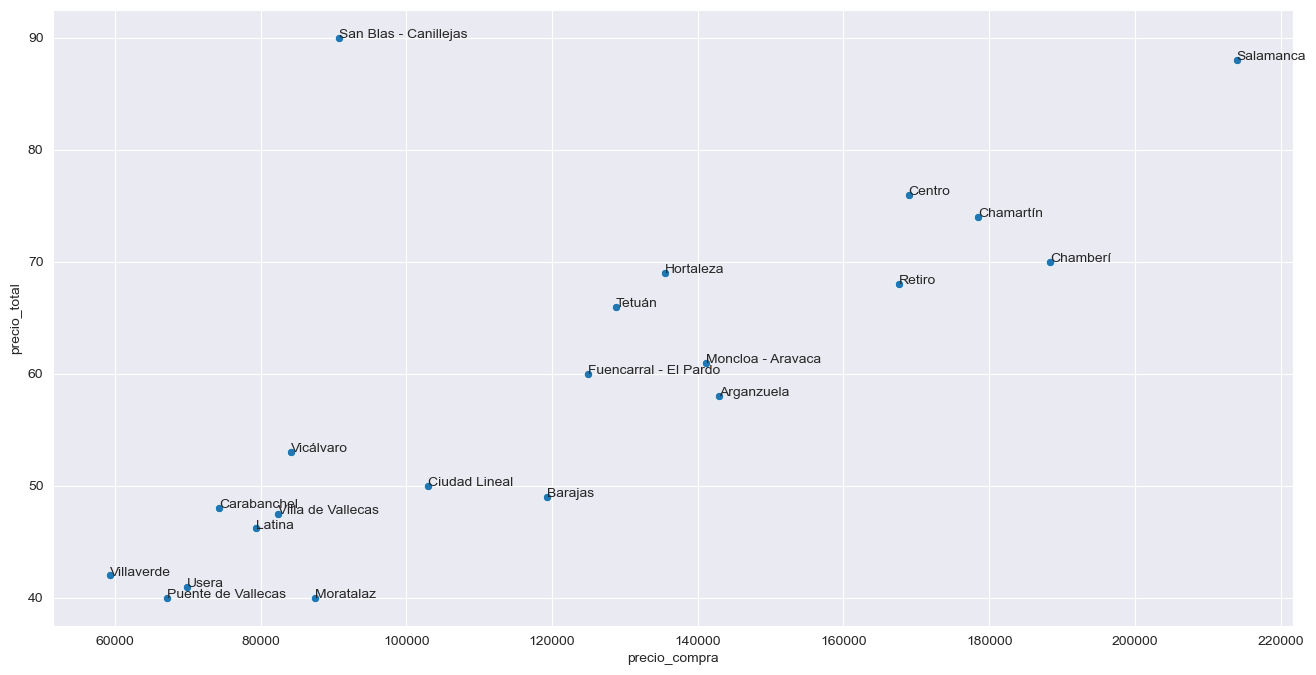

In [14]:
temp = df.groupby('distrito')[['precio_total','precio_compra']].median()

plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra[cada], temp.precio_total[cada], temp.index[cada])

Exhibit 1.4.5

In [15]:
import folium

datos = df[df.distrito == 'San Blas - Canillejas'].copy()

datos['precio_total_disc'] = pd.qcut(datos['precio_total'], q = [0, .25, .5, .75, 1.], 
                              labels=['yellow', 'orange', 'blue', 'red'])

mapa = folium.Map(location=[datos.iloc[0,7], datos.iloc[0,8]],zoom_start=14)

for piso in range(0,len(datos)):
   folium.CircleMarker(
      location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
      popup = datos.iloc[piso]['precio_total'],
      fill=True,
      color = datos.iloc[piso]['precio_total_disc'],
      fill_opacity=1,
      radius = 5
   ).add_to(mapa)

mapa